In [0]:
import pandas as pd
import numpy as np

# Project 1

In [0]:
data1 = pd.read_csv('fifa19_data.csv')

data1.head()
data1 = data1.iloc[:300,:]

In [0]:
data1.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,189833.116667,27.430000,84.396667,86.123333,1948.916667,2.750000,3.333333,3.026667,12.170000,62.723333,60.120000,61.693333,74.653333,59.083333,69.906667,63.12000,57.786667,68.746667,74.033333,71.520000,71.926667,71.566667,82.313333,67.623333,69.836667,70.980000,72.773333,71.730000,63.180000,65.910000,57.920000,64.023333,71.826667,60.270000,78.603333,57.160000,56.000000,52.450000,19.876667,19.703333,18.880000,19.566667,20.013333
std,86.746758,34251.353640,3.507055,2.484599,3.008592,286.359627,0.862155,0.773012,1.162092,8.791591,23.258906,24.917501,22.756218,16.380299,23.982081,23.403212,23.91552,22.918961,16.251858,20.806777,14.440615,12.999407,15.175635,3.928520,16.552585,19.688969,12.395905,16.251636,11.759452,23.755885,18.415546,25.146133,25.665252,14.567682,19.525914,8.785401,24.889879,27.462105,27.383823,25.129393,24.434103,22.785585,24.685965,25.685124
min,0.000000,41.000000,18.000000,82.000000,82.000000,1060.000000,1.000000,1.000000,1.000000,1.000000,9.000000,8.000000,10.000000,15.000000,8.000000,9.000000,9.00000,8.000000,16.000000,14.000000,34.000000,33.000000,32.000000,68.000000,27.000000,14.000000,30.000000,20.000000,37.000000,7.000000,18.000000,11.000000,7.000000,22.000000,11.000000,20.000000,9.000000,10.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,74.750000,182514.000000,25.000000,82.750000,84.000000,1903.500000,2.000000,3.000000,2.000000,7.000000,53.000000,43.000000,51.000000,75.000000,44.000000,64.000000,50.00000,45.750000,64.000000,73.000000,62.000000,64.000000,61.000000,80.000000,55.000000,66.000000,64.000000,68.000000,64.000000,53.750000,55.750000,35.000000,48.750000,62.750000,47.750000,75.000000,35.000000,30.000000,26.000000,8.000000,8.000000,8.000000,7.000000,8.000000
50%,149.500000,193385.000000,27.000000,84.000000,86.000000,2045.500000,3.000000,3.000000,3.000000,10.000000,72.000000,70.000000,69.000000,80.000000,68.000000,79.000000,73.00000,64.500000,74.000000,82.000000,73.000000,73.000000,75.000000,82.000000,71.000000,78.000000,73.000000,76.000000,72.500000,73.000000,71.000000,64.000000,77.000000,76.000000,66.000000,80.000000,60.000000,59.000000,52.500000,11.000000,11.000000,11.000000,11.000000,10.500000
75%,224.250000,207640.250000,30.000000,86.000000,88.000000,2137.250000,3.000000,4.000000,4.000000,17.000000,80.000000,79.000000,80.000000,84.000000,78.000000,85.000000,81.00000,76.000000,80.000000,85.250000,83.250000,82.000000,84.000000,84.250000,80.250000,82.000000,79.000000,84.000000,80.000000,80.000000,81.000000,82.000000,83.000000,83.000000,75.000000,84.000000,80.000000,83.000000,80.250000,14.000000,14.000000,14.000000,14.000000,14.000000
max,299.000000,236583.000000,40.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,77.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.00000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,95.000000,95.000000,95.000000,96.000000,94.000000,94.000000,94.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.0

In [0]:
x_features = data1[['Age','Potential','Wage','BallControl','SprintSpeed','Agility','GKHandling']]
y = data1['Release Clause']

In [0]:
data1['Release Clause']

0      €226.5M
1      €127.1M
2      €228.1M
3      €138.6M
4      €196.4M
5      €172.1M
6      €137.4M
7        €164M
8      €104.6M
9      €144.5M
10     €127.1M
11     €156.8M
12      €90.2M
13       €111M
14     €121.3M
15     €153.5M
16     €160.7M
17     €165.8M
18     €123.3M
19     €113.7M
20     €105.6M
21       €111M
22      €62.7M
23     €119.3M
24      €44.6M
25     €166.1M
26     €137.3M
27     €126.4M
28         NaN
29     €105.4M
        ...   
270     €56.3M
271     €50.6M
272     €49.5M
273     €45.7M
274     €43.6M
275     €57.6M
276     €40.7M
277     €42.4M
278     €38.2M
279     €34.6M
280     €47.9M
281     €44.4M
282     €36.6M
283     €38.9M
284     €37.4M
285     €32.8M
286     €44.1M
287     €28.9M
288     €44.1M
289     €49.4M
290     €34.2M
291     €21.3M
292     €42.8M
293       €30M
294     €41.8M
295     €45.2M
296     €34.2M
297     €36.6M
298     €15.3M
299       €34M
Name: Release Clause, Length: 300, dtype: object

## making sure I get no surprises
 |<br>
 |<br>
 |<br>
V

In [0]:
x_features.isnull().any()

Age            False
Potential      False
Wage           False
BallControl    False
SprintSpeed    False
Agility        False
GKHandling     False
dtype: bool

In [0]:
for x in x_features:
  print(type(x))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [0]:
x_features['Wage']=x_features['Wage'].str.replace("€",'')
x_features['Wage']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0      565K
1      405K
2      290K
3      260K
4      355K
5      340K
6      420K
7      455K
8      380K
9       94K
10     205K
11     355K
12     125K
13     285K
14     225K
15     205K
16     205K
17     145K
18     240K
19     240K
20     315K
21     200K
22     130K
23     300K
24     215K
25     100K
26     255K
27     285K
28     315K
29     165K
       ... 
270     78K
271     67K
272     31K
273     32K
274     19K
275     44K
276      1K
277     43K
278     61K
279     46K
280     67K
281    115K
282     84K
283    140K
284    115K
285     50K
286      1K
287     77K
288      1K
289    130K
290     99K
291     73K
292    125K
293     15K
294    120K
295     22K
296    125K
297     45K
298     59K
299     18K
Name: Wage, Length: 300, dtype: object

In [0]:
for number in enumerate(x_features['Wage'].astype('str')):
  if number[1][-1] == 'K':
    x = number[1].replace("K", '')
    x_features['Wage'][number[0]] = float(x)/1000
print(x_features['Wage'])

0      5.65e-07
1      4.05e-07
2       2.9e-07
3       2.6e-07
4      3.55e-07
5       3.4e-07
6       4.2e-07
7      4.55e-07
8       3.8e-07
9       9.4e-08
10     2.05e-07
11     3.55e-07
12     1.25e-07
13     2.85e-07
14     2.25e-07
15     2.05e-07
16     2.05e-07
17     1.45e-07
18      2.4e-07
19      2.4e-07
20     3.15e-07
21        2e-07
22      1.3e-07
23        3e-07
24     2.15e-07
25        1e-07
26     2.55e-07
27     2.85e-07
28     3.15e-07
29     1.65e-07
         ...   
270       0.078
271       0.067
272       0.031
273       0.032
274       0.019
275       0.044
276       0.001
277       0.043
278       0.061
279       0.046
280       0.067
281       0.115
282       0.084
283        0.14
284       0.115
285        0.05
286       0.001
287       0.077
288       0.001
289        0.13
290       0.099
291       0.073
292       0.125
293       0.015
294        0.12
295       0.022
296       0.125
297       0.045
298       0.059
299       0.018
Name: Wage, Length: 300,

In [0]:
x_features['GKHandling'].fillna(np.mean(x_features['GKHandling']),inplace=True)
x_features['SprintSpeed'].fillna(np.mean(x_features['GKHandling']),inplace=True)
x_features['Agility'].fillna(np.mean(x_features['GKHandling']),inplace=True)
x_features['GKHandling'].fillna(np.mean(x_features['GKHandling']),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
x_features.describe()

,Age,Potential,BallControl,SprintSpeed,Agility,GKHandling
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,27.430000,86.123333,74.033333,71.926667,71.566667,19.703333
std,3.507055,3.008592,20.806777,12.999407,15.175635,24.434103
min,18.000000,82.000000,14.000000,33.000000,32.000000,2.000000
25%,25.000000,84.000000,73.000000,64.000000,61.000000,8.000000
50%,27.000000,86.000000,82.000000,73.000000,75.000000,11.000000
75%,30.000000,88.000000,85.250000,82.000000,84.000000,14.000000
max,40.000000,95.000000,96.000000,96.000000,96.000000,92.000000


## Cancerous replacement for the symbols in our y values.

In [0]:
y=y.str.replace("€",'')
y=y.str.replace("M",'')

In [0]:
for number in enumerate(y.astype('str')):
    if number[1].find('K') != -1:
        x= number[1].replace("K", '')
        y[number[0]] = float(x)/1000
print(y)

0      226.5
1      127.1
2      228.1
3      138.6
4      196.4
5      172.1
6      137.4
7        164
8      104.6
9      144.5
10     127.1
11     156.8
12      90.2
13       111
14     121.3
15     153.5
16     160.7
17     165.8
18     123.3
19     113.7
20     105.6
21       111
22      62.7
23     119.3
24      44.6
25     166.1
26     137.3
27     126.4
28       NaN
29     105.4
       ...  
270     56.3
271     50.6
272     49.5
273     45.7
274     43.6
275     57.6
276     40.7
277     42.4
278     38.2
279     34.6
280     47.9
281     44.4
282     36.6
283     38.9
284     37.4
285     32.8
286     44.1
287     28.9
288     44.1
289     49.4
290     34.2
291     21.3
292     42.8
293       30
294     41.8
295     45.2
296     34.2
297     36.6
298     15.3
299       34
Name: Release Clause, Length: 300, dtype: object


In [0]:
y=y.astype('float')
y.describe()

y.fillna(np.mean(y),inplace=True)
y

0      226.500000
1      127.100000
2      228.100000
3      138.600000
4      196.400000
5      172.100000
6      137.400000
7      164.000000
8      104.600000
9      144.500000
10     127.100000
11     156.800000
12      90.200000
13     111.000000
14     121.300000
15     153.500000
16     160.700000
17     165.800000
18     123.300000
19     113.700000
20     105.600000
21     111.000000
22      62.700000
23     119.300000
24      44.600000
25     166.100000
26     137.300000
27     126.400000
28      64.930847
29     105.400000
          ...    
270     56.300000
271     50.600000
272     49.500000
273     45.700000
274     43.600000
275     57.600000
276     40.700000
277     42.400000
278     38.200000
279     34.600000
280     47.900000
281     44.400000
282     36.600000
283     38.900000
284     37.400000
285     32.800000
286     44.100000
287     28.900000
288     44.100000
289     49.400000
290     34.200000
291     21.300000
292     42.800000
293     30.000000
294     41

### Rip - attempt to fix in roundabout way

In [0]:
y = data1['Release Clause']
y_fixed = []

y = y.astype(str)

for number in y:
  for digit in range(len(number)):
      new_number = ''
      
      if number[digit]!='€':
        new_number += number[digit]
        
  if new_number[-1]=='M':
    newnew_number = ''
    for newdigit in new_number:
      if newdigit!='M':
        newnew_number+=newdigit
    print(newnew_number)
    #new_number = float(newnew_number)*1000000

  elif new_number[-1]!='K':
    newnew_number = ''
    for newdigit in new_number:
      if newdigit!='K':
        newnew_number+=newdigit
    print(newnew_number)
    #new_number = float(newnew_number)*1000

  y_fixed.append(new_number)
  print(new_number)
      
print(y)
      
      #if number[digit]==('€'):
        #number.replace('€','')
        #print(number)
        

In [0]:
y = data1['Release Clause']
temp_wordlist = []

for word in y:
  #the element
  print('\n\n',word)
  
  #Store each letter in the word
  letters = []
  
  for x in range(len(word)):
    if word[x]==('€'):
      letters.append(word[x])
    
  new_word = ''
  for y in letters:
    new_word += str(y)
  
  #Convert to millions
  
  new_word = (float(new_word))*1000000
  
  temp_wordlist.append(new_word)
  
  letters.clear()
  print(new_word)

temp_wordlist
#y.clear()
#y.append(temp_wordlist)


In [0]:
import sklearn.model_selection as ms
from sklearn.tree import DecisionTreeRegressor as dtr

## Split into test and train

In [0]:
x_train, x_test, y_train, y_test = ms.train_test_split(x_features,y,test_size=0.3)

## Fitting all 3 models with different criterion with training data

In [0]:
model_a = dtr(criterion='mse',max_depth=3)
model_b = dtr(criterion='mae',max_depth=5)
model_c = dtr(criterion='friedman_mse',max_depth=5)

model_a.fit(x_train,y_train)
model_b.fit(x_train,y_train)
model_c.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

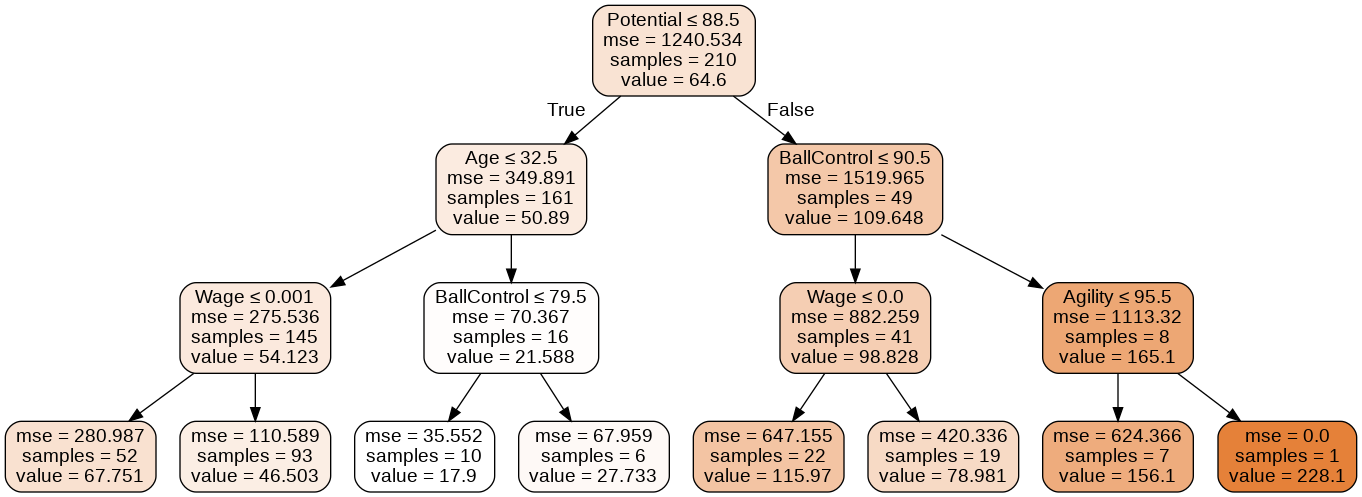

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model_a, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model_b, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model_c, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
print(model_a.score(x_test,y_test),
      model_b.score(x_test,y_test),
      model_c.score(x_test,y_test))

0.705067059074951 0.6327587308637717 0.6542789290215498


# Mse criterion has the best score out of the three.